In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential,save_model
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adadelta,Adam,RMSprop
%matplotlib inline 

In [4]:
from keras.datasets import boston_housing

In [12]:
(x_train,y_train),(x_test,y_test) = boston_housing.load_data()

In [49]:
model = Sequential()
model.add(Dense(128,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(1))
model.compile(loss ='mse',optimizer=RMSprop())
stop = EarlyStopping(monitor = 'val_loss',patience=1)

In [95]:
model.fit(x=x_train,y=y_train,epochs = 250)

Epoch 1/250
404/404 [==============================] - 0s 57us/step - loss: 15.3962
Epoch 2/250
404/404 [==============================] - 0s 52us/step - loss: 16.6496
Epoch 3/250
404/404 [==============================] - 0s 59us/step - loss: 15.3783
Epoch 4/250
404/404 [==============================] - 0s 54us/step - loss: 15.1053
Epoch 5/250
404/404 [==============================] - 0s 57us/step - loss: 10.5097
Epoch 6/250
404/404 [==============================] - 0s 57us/step - loss: 17.5984
Epoch 7/250
404/404 [==============================] - 0s 57us/step - loss: 15.2755
Epoch 8/250
404/404 [==============================] - 0s 47us/step - loss: 14.7614
Epoch 9/250
404/404 [==============================] - 0s 57us/step - loss: 13.7390
Epoch 10/250
404/404 [==============================] - 0s 64us/step - loss: 15.8515
Epoch 11/250
404/404 [==============================] - 0s 51us/step - loss: 13.2169
Epoch 12/250
404/404 [==============================] - 0s 62us/step - los

404/404 [==============================] - 0s 57us/step - loss: 9.9187
Epoch 98/250
404/404 [==============================] - 0s 57us/step - loss: 12.8795
Epoch 99/250
404/404 [==============================] - 0s 65us/step - loss: 11.3424
Epoch 100/250
404/404 [==============================] - 0s 47us/step - loss: 11.4786
Epoch 101/250
404/404 [==============================] - 0s 67us/step - loss: 12.7239
Epoch 102/250
404/404 [==============================] - 0s 52us/step - loss: 12.2696
Epoch 103/250
404/404 [==============================] - 0s 61us/step - loss: 10.9985
Epoch 104/250
404/404 [==============================] - 0s 47us/step - loss: 9.4394
Epoch 105/250
404/404 [==============================] - 0s 52us/step - loss: 14.5882
Epoch 106/250
404/404 [==============================] - 0s 49us/step - loss: 9.5404
Epoch 107/250
404/404 [==============================] - 0s 54us/step - loss: 11.8456
Epoch 108/250
404/404 [==============================] - 0s 59us/step - l

404/404 [==============================] - 0s 59us/step - loss: 9.6860
Epoch 193/250
404/404 [==============================] - 0s 53us/step - loss: 10.3281
Epoch 194/250
404/404 [==============================] - 0s 54us/step - loss: 9.0161
Epoch 195/250
404/404 [==============================] - 0s 52us/step - loss: 8.6301
Epoch 196/250
404/404 [==============================] - 0s 51us/step - loss: 9.5003
Epoch 197/250
404/404 [==============================] - 0s 56us/step - loss: 10.8992
Epoch 198/250
404/404 [==============================] - 0s 66us/step - loss: 8.5432
Epoch 199/250
404/404 [==============================] - 0s 52us/step - loss: 10.2618
Epoch 200/250
404/404 [==============================] - 0s 62us/step - loss: 8.3591
Epoch 201/250
404/404 [==============================] - 0s 62us/step - loss: 9.5108
Epoch 202/250
404/404 [==============================] - ETA: 0s - loss: 4.293 - 0s 52us/step - loss: 8.4852
Epoch 203/250
404/404 [=============================

In [97]:
loss = pd.DataFrame(model.history.history)

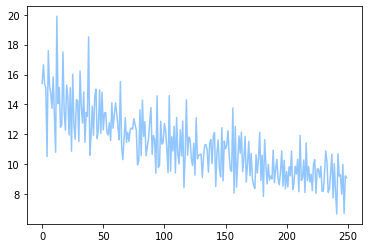

In [98]:
plt.plot(loss)

In [99]:
model.evaluate(x_test,y_test,verbose=0)

33.206818861119885

In [100]:
model.evaluate(x_train,y_train,verbose=0)

13.918189313152048

In [101]:
prediction = model.predict(x_test)

In [102]:
pred_df = pd.Series(prediction.reshape(102,))

In [103]:
y_test_pd = pd.DataFrame(y_test,columns=['y_test'])

In [104]:
last_df = pd.concat([pred_df,y_test_pd],axis=1)
last_df.columns = ['predicted','true_y_test']

In [105]:
last_df.head()

,predicted,true_y_test
0,12.909115,7.2
1,18.230307,18.8
2,18.982790,19.0
3,26.920750,27.0
4,20.989632,22.2


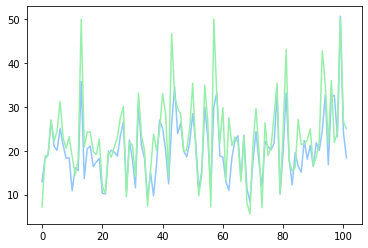

In [106]:
plt.style.use( 'seaborn-pastel')
plt.plot(last_df)

In [107]:
import seaborn as sns

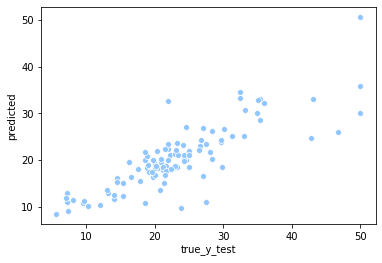

In [108]:
sns.scatterplot(x=last_df['true_y_test'],y=last_df['predicted'])